In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('/Users/dodkins/PythonProjects/stocks/options_testing/options_testing')
from datetime import datetime 
import pandas as pd
import opstrat as op

from robinhood import get_options_plays
from yahoo import get_tsla 
from plots import plot_candles, plot_timeseries, plot_line
from options import get_option_history, weekly_short_calls
from utils import aggregate
from quantconnect import load_tsla_minutely

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
tsla = load_tsla_minutely()

In [16]:
tsla

,open,close
date,,
2022-04-22 14:01:00,334.219967,334.333300
2022-04-22 14:02:00,334.413300,334.529967
2022-04-22 14:03:00,334.503300,334.283300
2022-04-22 14:04:00,334.253300,334.799967
2022-04-22 14:05:00,334.799967,335.056633
...,...,...
2022-09-02 15:56:00,270.390000,269.910000
2022-09-02 15:57:00,269.900000,269.410000
2022-09-02 15:58:00,269.410000,269.810000


In [17]:
tsla_weekly = aggregate(tsla, freq='weekly')
short_call = weekly_short_calls(tsla)

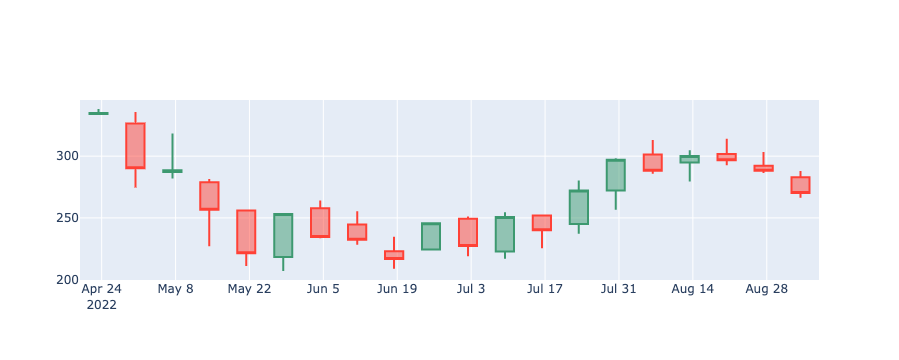

In [18]:
plot_candles(tsla_weekly, show_afterhours=True)
# plot_line(short_call, value='profit', show_afterhours=True)
# plot_line(short_call, value='running profit', show_afterhours=True)

In [19]:
tsla_hourly = aggregate(tsla, freq='hourly')
tsla_hourly

,open,high,low,close
2022-04-22 14:30:00,334.219967,338.084966,334.093300,334.583300
2022-04-22 15:30:00,334.589967,338.186633,334.589967,335.076633
2022-04-22 16:30:00,335.076633,335.076633,335.076633,335.016633
2022-04-25 09:30:00,326.463301,331.739967,325.389967,330.189967
2022-04-25 10:30:00,330.123300,335.811633,328.593300,331.536634
...,...,...,...,...
2022-09-02 12:30:00,277.330000,277.850000,271.430000,272.330000
2022-09-02 13:30:00,272.370000,273.180000,270.300000,270.430000
2022-09-02 14:30:00,270.410000,271.620000,269.740000,269.850000
2022-09-02 15:30:00,269.850000,271.110000,269.100000,269.800000


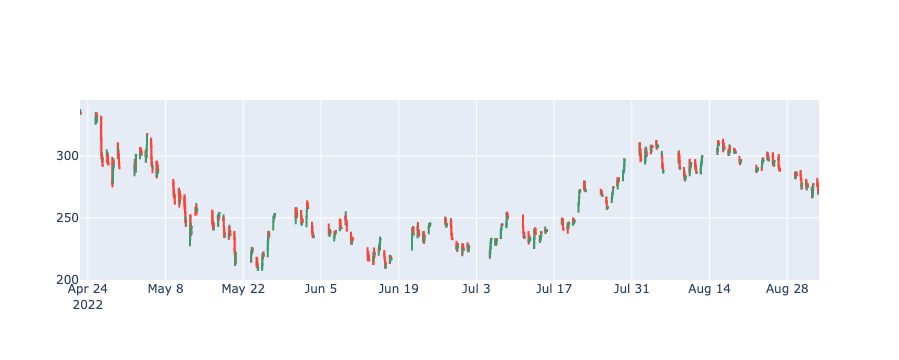

In [21]:
plot_candles(tsla_hourly)

In [26]:
def is_far_from_level(value, levels, df):    
    ave =  np.mean(df['high'] - df['low'])    
    return np.sum([abs(value-level)<ave for _,level in levels])==0

In [30]:
from mplfinance.original_flavor import candlestick_ohlc
def plot_all(levels, df):    
    fig, ax = plt.subplots(figsize=(16, 9))   
    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)    
    for level in levels:        
        plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
          max(df['Date']), colors='blue', linestyle='--')    
    fig.show()

In [53]:
df['date'] = df.index

In [40]:
df['date']

dtype('<M8[ns]')

In [54]:
df['time'] = ((df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).array

In [55]:
df = df[['time', 'open', 'high', 'low', 'close']]

In [56]:
df['time']

2022-04-22 14:30:00    1650637800
2022-04-22 15:30:00    1650641400
2022-04-22 16:30:00    1650645000
2022-04-25 09:30:00    1650879000
2022-04-25 10:30:00    1650882600
                          ...    
2022-09-02 12:30:00    1662121800
2022-09-02 13:30:00    1662125400
2022-09-02 14:30:00    1662129000
2022-09-02 15:30:00    1662132600
2022-09-02 16:30:00    1662136200
Name: time, Length: 739, dtype: int64

In [60]:
df['date'] = df.index

In [69]:
df = df.rename(columns={'date': 'Date'})

In [58]:
import matplotlib.dates as mpl_dates

In [71]:
pivots

[(Timestamp('2022-04-26 15:30:00'), 292.253304108),
 (Timestamp('2022-04-27 09:30:00'), 305.503302783),
 (Timestamp('2022-04-28 10:30:00'), 274.5549725445),
 (Timestamp('2022-04-29 10:30:00'), 310.993302234),
 (Timestamp('2022-05-02 09:30:00'), 283.803304953),
 (Timestamp('2022-05-04 15:30:00'), 318.359968164),
 (Timestamp('2022-05-10 11:30:00'), 258.519974148),
 (Timestamp('2022-05-12 09:30:00'), 227.069977293),
 (Timestamp('2022-05-16 15:30:00'), 239.813309352),
 (Timestamp('2022-05-17 14:30:00'), 254.676641199),
 (Timestamp('2022-05-19 09:30:00'), 231.9999768),
 (Timestamp('2022-05-19 11:30:00'), 244.396642227),
 (Timestamp('2022-05-20 13:30:00'), 211.06664556),
 (Timestamp('2022-05-24 15:30:00'), 206.996645967),
 (Timestamp('2022-06-02 12:30:00'), 264.16664025),
 (Timestamp('2022-06-08 10:30:00'), 249.576641709),
 (Timestamp('2022-06-17 09:30:00'), 220.203311313),
 (Timestamp('2022-07-25 09:30:00'), 268.746639792),
 (Timestamp('2022-08-09 12:30:00'), 279.546638712),
 (Timestamp('20

In [72]:
#method 2: window shifting method
#using the same symbol as the first example above
# df = tsla_hourly
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
    # taking a window of 9 candles
    high_range = df['high'][i-5:i+4]
    current_max = high_range.max()
    # if we find a new maximum value, empty the max_list 
    if current_max not in max_list:
        max_list = []
    max_list.append(current_max)
    # if the maximum value remains the same after shifting 5 times
    if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
        pivots.append((high_range.idxmax(), current_max))

    low_range = df['low'][i-5:i+5]
    current_min = low_range.min()
    if current_min not in min_list:
        min_list = []
    min_list.append(current_min)
    if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
        pivots.append((low_range.idxmin(), current_min))
# plot_all(pivots, df)

In [74]:
import plotly.graph_objects as go

In [76]:
from plots import update_fig

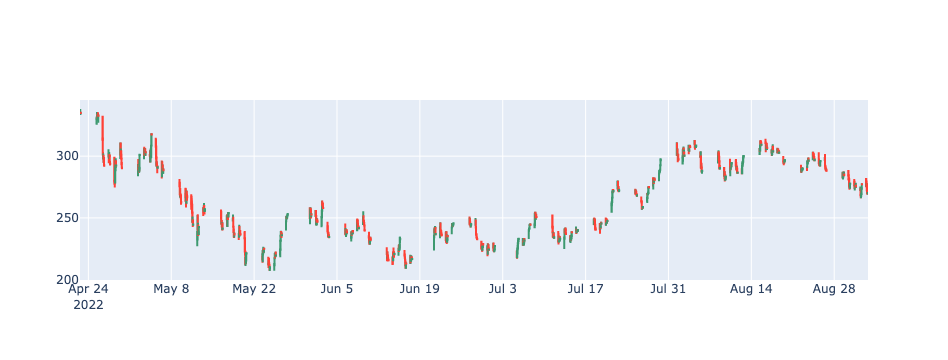

In [94]:
value=None
show_afterhours=True
if not value:
    value = ['open', 'high', 'low', 'close']
index = df['date'] if 'date' in df.columns else df.index
fig = go.Figure(data=[go.Candlestick(x=index,
        open=df[value[0]],
        high=df[value[1]],
        low=df[value[2]],
        close=df[value[3]])])
update_fig(fig, show_afterhours=show_afterhours)

In [78]:
pivots[0]

(Timestamp('2022-04-26 15:30:00'), 292.253304108)

In [103]:
from datetime import timedelta

print(tsla_hourly.index[-1] , tsla_hourly.index[-1] + timedelta(seconds=1.1 * tsla_hourly.index[-1].second))

2022-09-02 16:30:00 2022-09-02 16:30:00


In [105]:
timedelta(seconds=timedelta(minutes=42).total_seconds() * 0.8)

datetime.timedelta(seconds=2016)

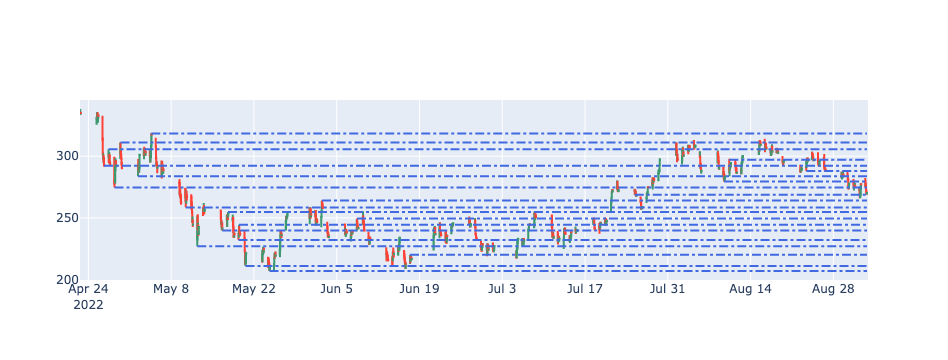

In [95]:
for pivot in pivots:
    fig.add_shape(type='line',
                    x0=pivot[0],
                    y0=pivot[1],
                    x1=tsla_hourly.index[-1],
                    y1=pivot[1],
                    line=dict(color='RoyalBlue',dash="dashdot",),
                    xref='x',
                    yref='y'
    )
update_fig(fig, show_afterhours=show_afterhours)